In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_csv('cab_rides.csv')

In [4]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [9]:
df.describe(include="all")

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
count,693071.000000,693071,6.930710e+05,693071,693071,637976.000000,693071.000000,693071,693071,693071
unique,NaN,2,NaN,12,12,NaN,NaN,693071,13,13
top,NaN,Uber,NaN,Financial District,Financial District,NaN,NaN,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
freq,NaN,385663,NaN,58851,58857,NaN,NaN,1,55096,55096
mean,2.189430,NaN,1.544046e+12,NaN,NaN,16.545125,1.013870,NaN,NaN,NaN
std,1.138937,NaN,6.891925e+08,NaN,NaN,9.324359,0.091641,NaN,NaN,NaN
min,0.020000,NaN,1.543204e+12,NaN,NaN,2.500000,1.000000,NaN,NaN,NaN
25%,1.280000,NaN,1.543444e+12,NaN,NaN,9.000000,1.000000,NaN,NaN,NaN
50%,2.160000,NaN,1.543737e+12,NaN,NaN,13.500000,1.000000,NaN,NaN,NaN
75%,2.920000,NaN,1.544828e+12,NaN,NaN,22.500000,1.000000,NaN,NaN,NaN


In [8]:
df.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [10]:
df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [11]:
df.shape

(693071, 10)

In [12]:
df["price"].describe()
df["distance"].describe()


count    693071.000000
mean          2.189430
std           1.138937
min           0.020000
25%           1.280000
50%           2.160000
75%           2.920000
max           7.860000
Name: distance, dtype: float64

In [13]:
df.isnull().values.any()


np.True_

In [15]:
df_clean = df.dropna(subset=["price"])  


In [17]:
df_clean.shape

(637976, 10)

In [18]:
df_clean = df_clean[(df_clean["price"] > 0) & (df_clean["distance"] > 0)]
df_clean.shape


(637976, 10)

In [19]:
df_clean["price"].describe()
df_clean["distance"].describe()


count    637976.000000
mean          2.189261
std           1.135413
min           0.020000
25%           1.270000
50%           2.160000
75%           2.930000
max           7.860000
Name: distance, dtype: float64

In [20]:
df_clean["time_stamp"] = pd.to_datetime(df_clean["time_stamp"])
df_clean[["time_stamp"]].head()


,time_stamp
0,1970-01-01 00:25:44.952607890
1,1970-01-01 00:25:43.284023677
2,1970-01-01 00:25:43.366822198
3,1970-01-01 00:25:43.553582749
4,1970-01-01 00:25:43.463360223


In [21]:
df_clean["hour"] = df_clean["time_stamp"].dt.hour
df_clean["dayofweek"] = df_clean["time_stamp"].dt.dayofweek  # Monday=0, Sunday=6
df_clean["month"] = df_clean["time_stamp"].dt.month

df_clean[["time_stamp", "hour", "dayofweek", "month"]].head()


,time_stamp,hour,dayofweek,month
0,1970-01-01 00:25:44.952607890,0,3,1
1,1970-01-01 00:25:43.284023677,0,3,1
2,1970-01-01 00:25:43.366822198,0,3,1
3,1970-01-01 00:25:43.553582749,0,3,1
4,1970-01-01 00:25:43.463360223,0,3,1


In [22]:
df_clean["time_stamp"] = pd.to_datetime(df_clean["time_stamp"])
df_clean["hour"] = df_clean["time_stamp"].dt.hour
df_clean["dayofweek"] = df_clean["time_stamp"].dt.dayofweek
df_clean["month"] = df_clean["time_stamp"].dt.month

df_clean[["time_stamp", "hour", "dayofweek", "month"]].head()


,time_stamp,hour,dayofweek,month
0,1970-01-01 00:25:44.952607890,0,3,1
1,1970-01-01 00:25:43.284023677,0,3,1
2,1970-01-01 00:25:43.366822198,0,3,1
3,1970-01-01 00:25:43.553582749,0,3,1
4,1970-01-01 00:25:43.463360223,0,3,1


In [23]:
features = ["distance", "surge_multiplier", "hour", "dayofweek",
            "cab_type", "name", "source", "destination"]

df_model = df_clean[features + ["price"]].copy()

X = df_model[features]
y = df_model["price"]


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% test
    random_state=42,    # makes results reproducible
    shuffle=True
)

X_train.shape


(510380, 8)

In [27]:
X_test.shape

(127596, 8)

In [30]:
categorical_cols = ["cab_type", "name", "source", "destination"]

X_train_enc = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_enc  = pd.get_dummies(X_test,  columns=categorical_cols, drop_first=True)


In [31]:
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join="left", axis=1, fill_value=0)

X_train_enc.shape, X_test_enc.shape


((510380, 38), (127596, 38))

In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_enc, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
lin_reg.score(X_train_enc, y_train)  # R² on training data


0.9285922738788124

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = lin_reg.predict(X_test_enc)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)   
rmse = np.sqrt(mse)                        
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(1.7491555975995543, np.float64(2.4935989981248743), 0.9286762351210308)

In [36]:
# 1. Build a single example (change values as you like)
sample = {
    "distance": [3.0],
    "surge_multiplier": [1.5],
    "hour": [18],          # 6 PM
    "dayofweek": [2],      # Wednesday
    "cab_type": ["Uber"],
    "name": ["UberX"],
    "source": ["Back Bay"],
    "destination": ["North End"]
}

import pandas as pd
sample_df = pd.DataFrame(sample)

# 2. One-hot encode using same logic
categorical_cols = ["cab_type", "name", "source", "destination"]
sample_enc = pd.get_dummies(sample_df, columns=categorical_cols, drop_first=True)

# 3. Align with training columns
sample_enc = sample_enc.reindex(columns=X_train_enc.columns, fill_value=0)

# 4. Predict
predicted_price = lin_reg.predict(sample_enc)
predicted_price


array([28.77581719])

In [37]:
def predict_ride_price(model, X_train_enc, distance, surge_multiplier,
                       hour, dayofweek, cab_type, name, source, destination):
    sample = {
        "distance": [distance],
        "surge_multiplier": [surge_multiplier],
        "hour": [hour],
        "dayofweek": [dayofweek],
        "cab_type": [cab_type],
        "name": [name],
        "source": [source],
        "destination": [destination],
    }
    sample_df = pd.DataFrame(sample)

    categorical_cols = ["cab_type", "name", "source", "destination"]
    sample_enc = pd.get_dummies(sample_df, columns=categorical_cols, drop_first=True)

    # align with training columns
    sample_enc = sample_enc.reindex(columns=X_train_enc.columns, fill_value=0)

    pred = model.predict(sample_enc)[0]
    return pred


In [38]:
predict_ride_price(
    lin_reg,
    X_train_enc,
    distance=3.0,
    surge_multiplier=1.5,
    hour=18,
    dayofweek=2,
    cab_type="Uber",
    name="UberX",
    source="Back Bay",
    destination="North End"
)


np.float64(28.775817191847338)

In [39]:
feature_names = X_train_enc.columns
coeffs = lin_reg.coef_

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coeffs
}).sort_values(by="coefficient", ascending=False)

coef_df.head(10)      # largest positive effect on price
coef_df.tail(10)      # largest negative effect on price


,feature,coefficient
23,source_Northeastern University,-0.327270
16,source_Beacon Hill,-0.329511
29,destination_Fenway,-0.375855
10,name_Lyft XL,-2.696156
14,name_UberXL,-4.836304
9,name_Lyft,-8.402856
13,name_UberX,-10.749522
15,name_WAV,-10.749934
11,name_Shared,-11.277920
12,name_UberPool,-11.760820


In [40]:


coef_df[coef_df["feature"].str.contains("name_")].sort_values("coefficient")


,feature,coefficient
12,name_UberPool,-11.760820
11,name_Shared,-11.277920
15,name_WAV,-10.749934
13,name_UberX,-10.749522
9,name_Lyft,-8.402856
14,name_UberXL,-4.836304
10,name_Lyft XL,-2.696156
6,name_Lux,-0.219670
7,name_Lux Black,5.071095
5,name_Black SUV,9.763223


C:\Users\mayank goyal\AppData\Local\Temp\ipykernel_17032\2515384709.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


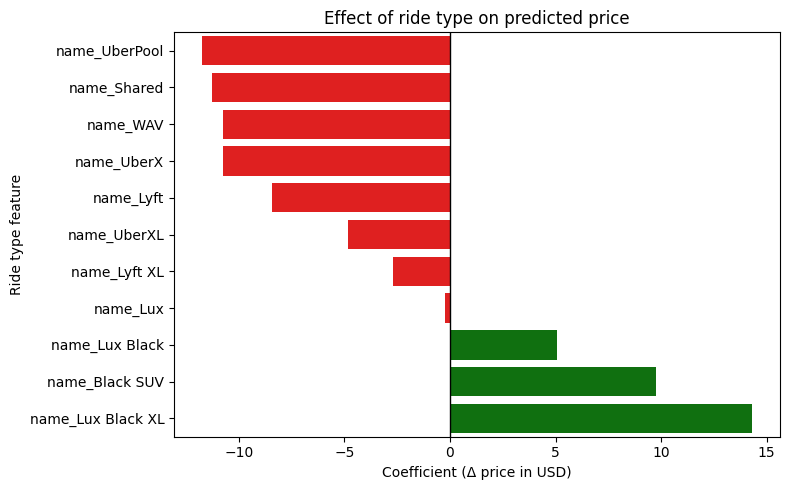

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

coef_sample = coef_df[coef_df["feature"].str.contains("name_")].copy()
coef_sample = coef_sample.sort_values("coefficient")  # cheapest at bottom/top

plt.figure(figsize=(8, 5))
sns.barplot(
    data=coef_sample,
    x="coefficient",
    y="feature",
    palette=["red" if c < 0 else "green" for c in coef_sample["coefficient"]]
)
plt.axvline(0, color="black", linewidth=1)
plt.xlabel("Coefficient (Δ price in USD)")
plt.ylabel("Ride type feature")
plt.title("Effect of ride type on predicted price")
plt.tight_layout()
plt.show()


In [42]:
weather = pd.read_csv('weather.csv')

weather.head()
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [43]:
weather.shape

(6276, 8)

In [44]:
df_clean.to_csv("df_clean.csv", index=False)


In [49]:
df_clean = pd.read_csv("df_clean.csv")

# convert to datetime
df_clean["time_stamp"] = pd.to_datetime(df_clean["time_stamp"])

# now split by cab_type
df_uber = df_clean[df_clean["cab_type"] == "Uber"].copy()
df_lyft = df_clean[df_clean["cab_type"] == "Lyft"].copy()

# now safely use .dt
for df_sub in [df_uber, df_lyft]:
    df_sub["hour"] = df_sub["time_stamp"].dt.hour
    df_sub["dayofweek"] = df_sub["time_stamp"].dt.dayofweek


In [52]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load clean data
df_clean = pd.read_csv("df_clean.csv")
df_clean["time_stamp"] = pd.to_datetime(df_clean["time_stamp"])

# Time features
df_clean["hour"] = df_clean["time_stamp"].dt.hour
df_clean["dayofweek"] = df_clean["time_stamp"].dt.dayofweek

# Features including cab_type
features = ["distance", "surge_multiplier", "hour", "dayofweek",
            "cab_type", "name", "source", "destination"]

df_model = df_clean[features + ["price"]].dropna().copy()

X = df_model[features]
y = df_model["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

categorical_cols = ["cab_type", "name", "source", "destination"]

X_train_enc = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_enc  = pd.get_dummies(X_test,  columns=categorical_cols, drop_first=True)
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join="left", axis=1, fill_value=0)

model = LinearRegression()
model.fit(X_train_enc, y_train)

joblib.dump({
    "model": model,
    "columns": X_train_enc.columns,
    "categorical_cols": categorical_cols
}, "ride_price_model.pkl")


['ride_price_model.pkl']